#  Data Visualization with Matplotlib & Plotly

In [3]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [4]:
# Load the Titanic dataset directly from seaborn
# This dataset contains demographic and survival information about Titanic passengers
df=pd.read_csv("Titanic-Dataset.csv")

# Display the first few rows to understand the structure
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Matplotlib is great for creating static, publication-quality plots.
- Let's start with simple examples and build up.


## Bar Chart
We'll visualize how many passengers were in each class

- color

In [5]:
class_counts = df['Pclass'].value_counts().sort_index()

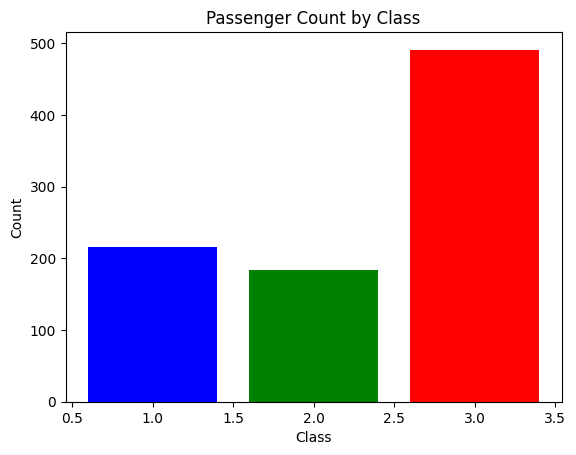

In [6]:
plt.bar(class_counts.index, class_counts.values, color=['blue','green','red'])
plt.title("Passenger Count by Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## YOUR TURN
Try plotting the number of survivors by sex.


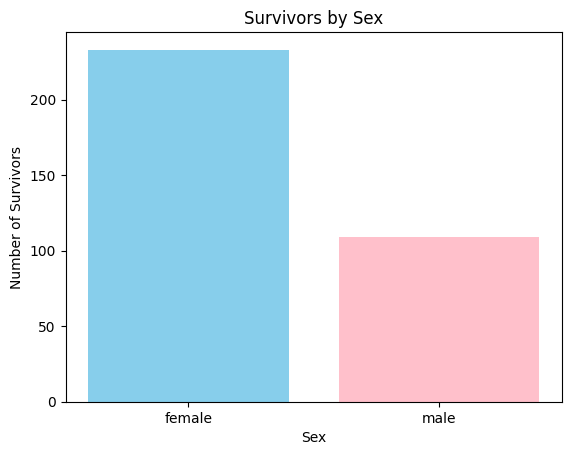

In [7]:
#ANSWER

survivors_by_sex = df.groupby('Sex')['Survived'].sum()
plt.bar(survivors_by_sex.index, survivors_by_sex.values, color=['skyblue', 'pink'])
plt.title('Survivors by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Survivors')
plt.show()

## Line Plot
We'll plot the average fare by passenger class

 - groupby('Pclass') groups passengers by class
 - ['Fare'].mean() calculates the average fare for each class
 - plt.plot() draws the line chart with markers for clarity

In [8]:
avg_fare = df.groupby('Pclass')['Fare'].mean()

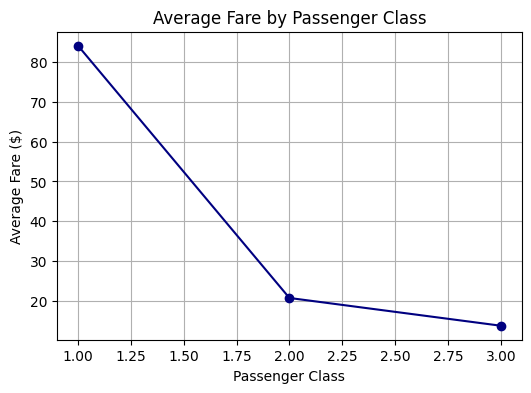

In [9]:
plt.figure(figsize=(6,4))
plt.plot(avg_fare.index, avg_fare.values, marker='o', linestyle='-', color='navy')
plt.title("Average Fare by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.show()

## Histogram
Let's look at the distribution of passenger ages

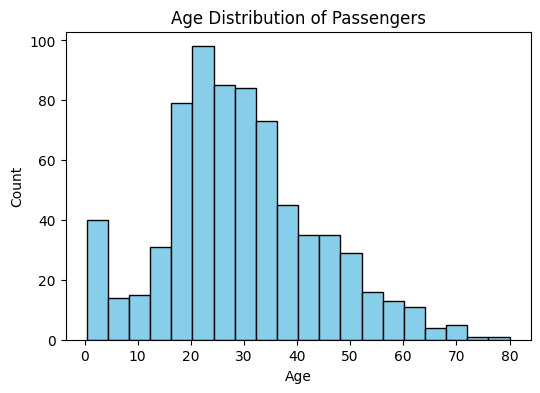

In [10]:
plt.figure(figsize=(6,4))
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## Scatter Plot
Let's explore the relationship between age and fare

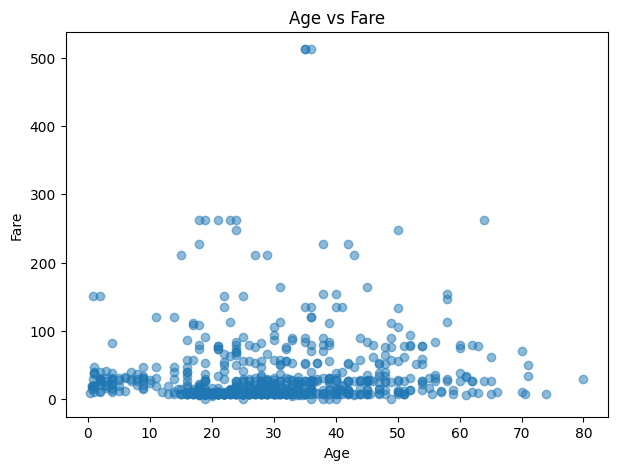

In [11]:

# The alpha value makes points semi-transparent to handle overlapping.
plt.figure(figsize=(7,5))
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

# YOUR TURN

Plot a histogram for 'fare' to explore ticket price distribution.


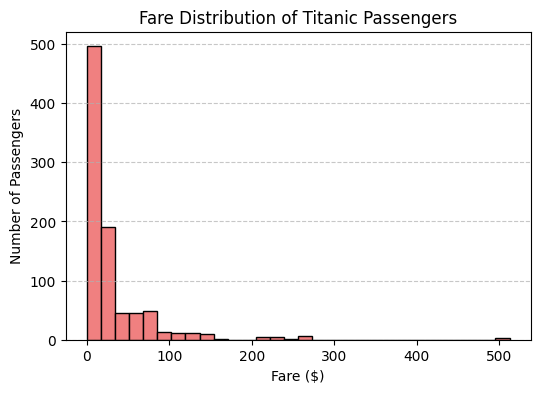

In [12]:
#ANSWER

# Plot histogram for 'fare' to explore ticket price distribution

plt.figure(figsize=(6,4))

# Drop missing values to avoid NaN issues
plt.hist(df['Fare'].dropna(), bins=30, color='lightcoral', edgecolor='black')

# Add title and axis labels
plt.title("Fare Distribution of Titanic Passengers")
plt.xlabel("Fare ($)")
plt.ylabel("Number of Passengers")

# Optional grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


## Subplots
Let's combine multiple plots in one figure.


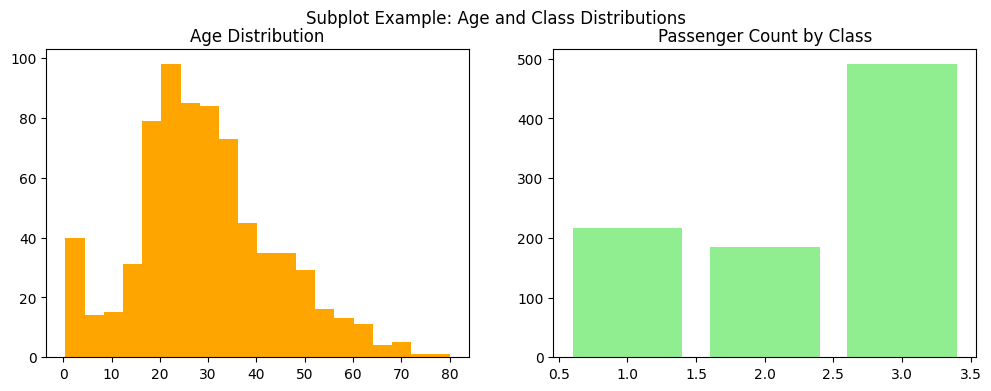

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(df['Age'].dropna(), bins=20, color='orange')
axes[0].set_title('Age Distribution')

axes[1].bar(class_counts.index, class_counts.values, color='lightgreen')
axes[1].set_title('Passenger Count by Class')

plt.suptitle("Subplot Example: Age and Class Distributions")
plt.show()

## Interactive Visualization with Plotly

Plotly Express allows easy interactive plots with minimal code.



```
fig = px.<chart_type>(
    data_frame,
    x=<column for x-axis>,
    y=<column for y-axis>,
    color=<column to color by>,
    size=<column to scale marker size>,
    facet_row=<column to create rows of subplots>,
    facet_col=<column to create columns of subplots>,
    title="Chart Title"
)
fig.show()
```

- px.<chart_type> could be px.bar, px.scatter, px.line, px.pie, etc.
- Each argument is tied to a column name from your DataFrame.
- The function returns a Figure object (fig), and you display it with .show().

## Interactive Scatter Plot

In [14]:
fig = px.scatter(
    df,
    x='Age', y='Fare',
    color='Sex',  # color by gender
    size='Fare',  # size of bubbles represents fare amount
    hover_data=['Pclass', 'Embarked', 'Survived'],
    title="Age vs Fare (Interactive)"
)
fig.show()

## Interactive Bar Chart
Let's plot survival rate by passenger class

In [15]:
survival_by_class = df.groupby('Pclass')['Survived'].mean().reset_index()

fig = px.bar(
    survival_by_class,
    x='Pclass', y='Survived',
    text='Survived',
    title="Survival Rate by Class",
    color='Pclass'
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()

#YOUR TURN

Create a bar chart showing average fare by embarkation port.

In [16]:
# Calculate the average fare for each embarkation port
avg_fare_by_port = df.groupby('Embarked')['Fare'].mean().reset_index()

# Display the result to check the data
print(avg_fare_by_port)

# Create a bar chart using Plotly Express for interactivity
fig = px.bar(
    avg_fare_by_port,
    x='Embarked',              # Embarkation port on x-axis
    y='Fare',                  # Average fare on y-axis
    color='Embarked',          # Color bars by port
    text='Fare',               # Show average fare on each bar
    title="Average Fare by Embarkation Port",
    labels={'Embarked': 'Embarkation Port', 'Fare': 'Average Fare ($)'},
    template='plotly_white'    # Use a clean, simple theme
)

# Format the labels on the bars (2 decimal places)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Display the figure
fig.show()


  Embarked       Fare
0        C  59.954144
1        Q  13.276030
2        S  27.079812


## Pie Chart
Let's visualize the proportion of passengers by class.

In [17]:
fig = px.pie(
    df,
    names='Pclass',
    title="Distribution of Passenger Classes",
    hole=0.4  # makes it a donut chart
)
fig.show()

## Mini Visualization Project

Let's combine multiple visuals to explore survival trends.

- Calculate survival rates by both class and sex

In [18]:
survival = df.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()


In [19]:
# Create grouped bar chart
fig = px.bar(
    survival,
    x='Pclass',
    y='Survived',
    color='Sex',
    barmode='group',
    text='Survived',
    title="Survival Rate by Class and Sex"
)
fig.show()